IMDB 데이터셋

In [1]:
import numpy as np
import pandas as pd
import os
import json
import re
import string
import nltk
from num2words import num2words

In [2]:
TRAIN_DATA_PATH = "C:/Users/user/Desktop/bilm-tf-master/textdataset/IMDB/aclImdb/train"
TEST_DATA_PATH = "C:/Users/user/Desktop/bilm-tf-master/textdataset/IMDB/aclImdb/test"

In [3]:
def read_text_file(path):
    labels = ['neg','pos']
    if os.path.exists(path):
        text=[]
        text_label =[]
        for directory_name in os.listdir(path):
            if directory_name in labels:
                label_index = labels.index(directory_name)
                data_path = os.path.join(path,directory_name)
                for file in os.listdir(data_path):
                    with open(os.path.join(data_path,file),'r', encoding='utf-8') as f:
                        text.append(f.read())
                        text_label.append(label_index)
        return pd.DataFrame(text,columns =['texts']),pd.DataFrame(text_label,columns =['label'])

In [4]:
x_train,y_train = read_text_file(TRAIN_DATA_PATH) 
x_test,y_test = read_text_file(TEST_DATA_PATH) 

In [5]:
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

In [6]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [7]:
train

,texts,label
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0
...,...,...
24995,"Seeing as the vote average was pretty low, and...",1
24996,"The plot had some wretched, unbelievable twist...",1
24997,I am amazed at how this movie(and most others ...,1
24998,A Christmas Together actually came before my t...,1


In [8]:
test

,texts,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
...,...,...
24995,I was extraordinarily impressed by this film. ...,1
24996,"Although I'm not a golf fan, I attended a snea...",1
24997,"From the start of ""The Edge Of Love"", the view...",1
24998,"This movie, with all its complexity and subtle...",1


<AxesSubplot:>

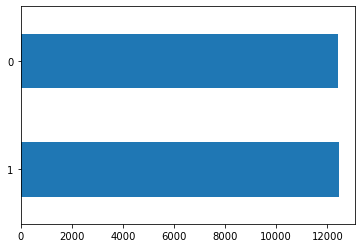

In [9]:
# train 분포 0: neg, 1: pos
train['label'].value_counts().plot.barh()

<AxesSubplot:>

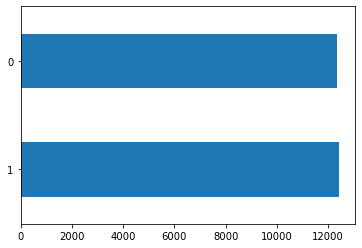

In [10]:
# test 분포 0: neg, 1: pos
test['label'].value_counts().plot.barh()

In [15]:
imdb=pd.concat([train,test])

<AxesSubplot:>

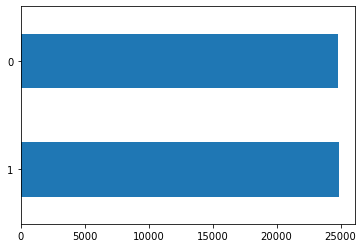

In [17]:
imdb['label'].value_counts().plot.barh()

In [ ]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

train[['texts']] = train[['texts']].applymap(lambda x:remove_punctuation(x))
train[['texts']] = train[['texts']].applymap(lambda x:x.lower())
test[['texts']] = test[['texts']].applymap(lambda x:remove_punctuation(x))
test[['texts']] = test[['texts']].applymap(lambda x:x.lower())

In [12]:
train

,texts,label
0,story of a man who has unnatural feelings for ...,0
1,airport 77 starts as a brand new luxury 747 pl...,0
2,this film lacked something i couldnt put my fi...,0
3,sorry everyone i know this is supposed to be a...,0
4,when i was little my parents took me along to ...,0
...,...,...
24995,seeing as the vote average was pretty low and ...,1
24996,the plot had some wretched unbelievable twists...,1
24997,i am amazed at how this movieand most others h...,1
24998,a christmas together actually came before my t...,1
